# Grip At The Sparks Foundation Intenship

## Task: 3 Exploratory Data Analysis - Retail

## Name: Shyam Kumar Kamasaini

## Dataset: SampleSupertore.csv

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1: Import Dataset

In [4]:
df=pd.read_csv("D:\dataset\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.shape

(9994, 13)

In [9]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
df['Postal Code'] = df['Postal Code'].astype('object')

In [11]:
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

## 2: Exploratory Data Analysis

<AxesSubplot: >

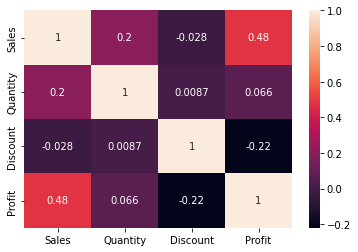

In [21]:
#corr = df.corr()
#sns.heatmap(corr,annot=True,cmap='Reds')
compare=df.loc[:,['Sales','Quantity','Discount','Profit']]
correlation=compare.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)



### Profit is more than that of sale but there are some areas where profit could be increased. 

## 3: Pairplot for analyse each column
###  [1] Based on Category

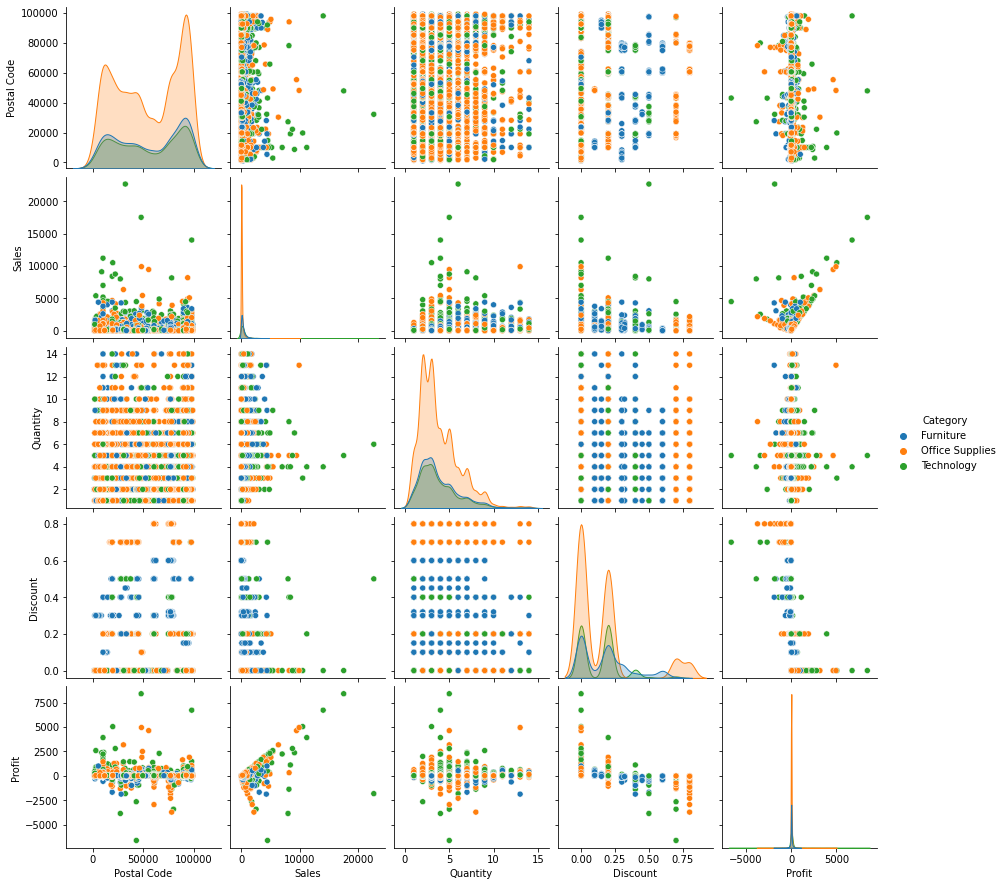

In [14]:
sns.pairplot(df,hue='Category')

### [2] Based on Region

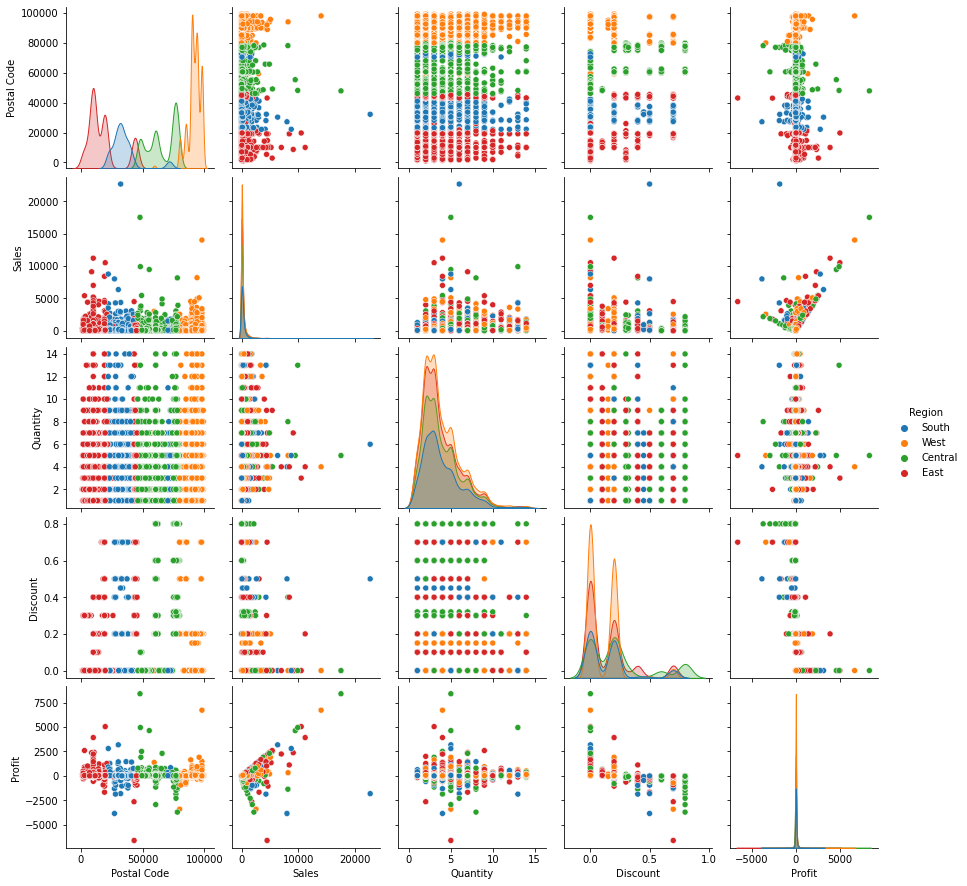

In [15]:
sns.pairplot(df,hue='Region')

### [3] Based on Segment

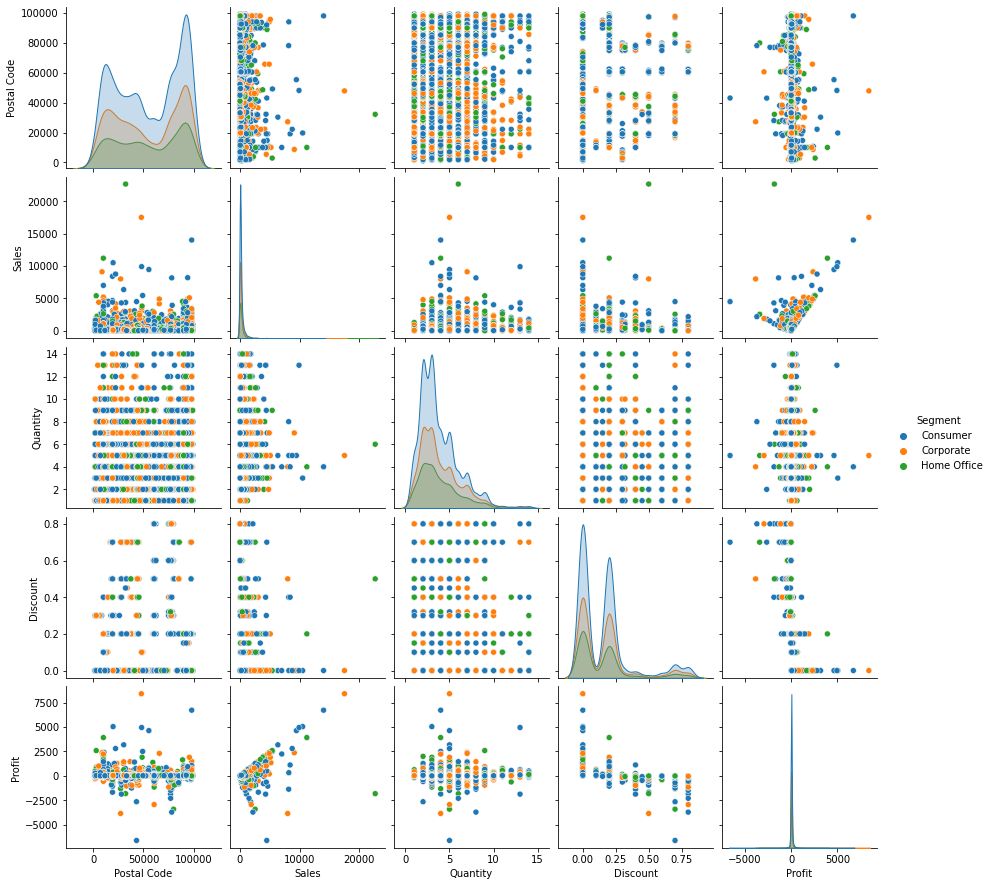

In [18]:
sns.pairplot(df,hue='Segment')

In [28]:
df.corr(numeric_only=True)

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


## 4: Segment wise analysis of Profit, Discount, Sale

In [23]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [24]:
df_segment= df.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
df_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.969279,0.158308,25.855188
Corporate,234.185781,0.158159,30.499164
Home Office,241.311234,0.147178,33.883643


Text(0.5, 1.0, 'Segment wise analysis of Sale, Discount, profit')

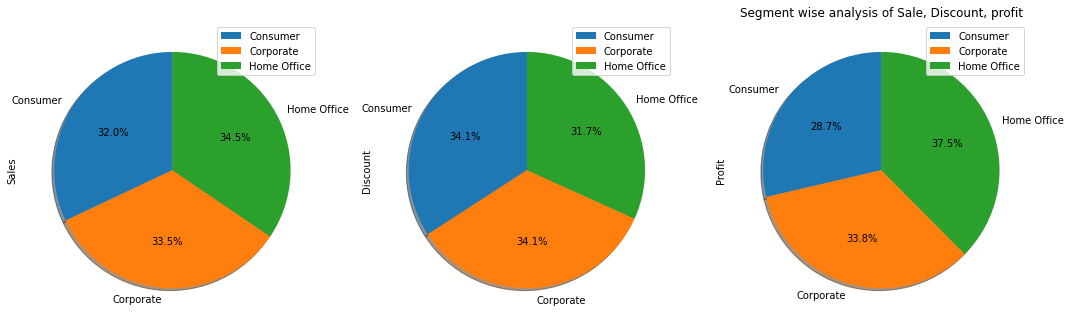

In [25]:
#1. sales 2. Discount 3. Profit
df_segment.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(18, 20),
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_segment.index)
plt.title('Segment wise analysis of Sale, Discount, profit')

## 5: State wise analysis of Profit, Discount, Sale

In [26]:
df['State'].value_counts().head(10)

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

In [27]:
df_state= df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,229.246629,0.072946,38.241878
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


### [1] State wise Profit analysis

In [ ]:
df_state1=df_state.sort_values('Profit')

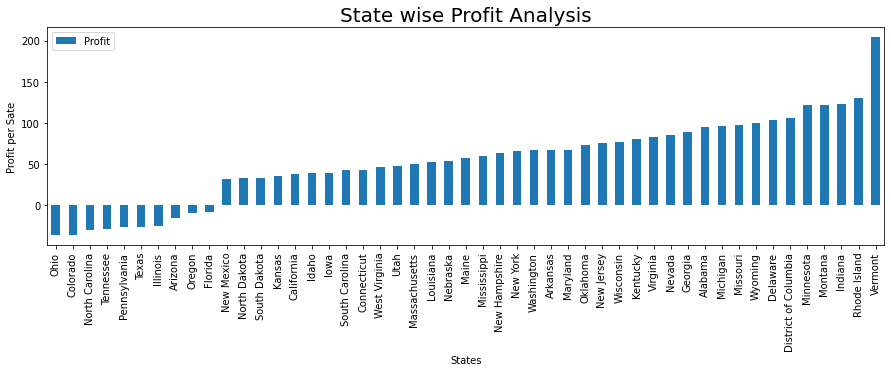

In [29]:
df_state1[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

#### Vermont: Highest Profit
#### Ohio: Lowest Profit

### [2] State wise Sale analysis

Text(0.5, 1.0, 'State wise analysis of Sale')

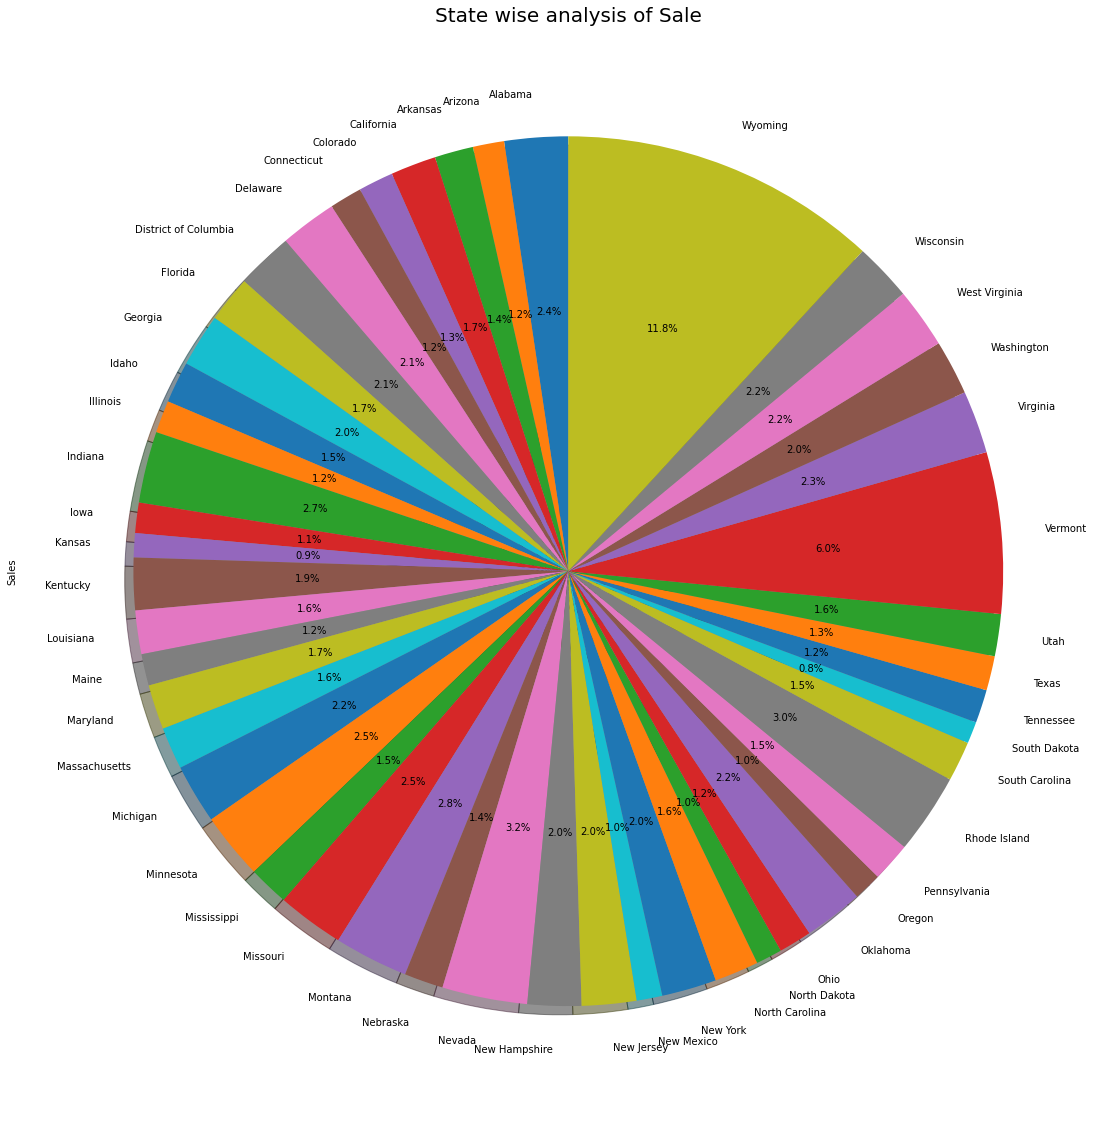

In [30]:
df_state['Sales'].plot(kind='pie',
                        figsize = (20,20),
                        autopct='%1.1f%%',
                        startangle=90,     # start angle 90° (Africa)
                        shadow=True)
plt.title('State wise analysis of Sale',fontsize=20)

#### Highest amount of sales= Wyoming(11.8%)
#### Lowest amount of sales= South Dakota(0.8%) 

### [3] State wise Discount analysis 

Text(0.5, 1.0, 'State wise analysis of Discount')

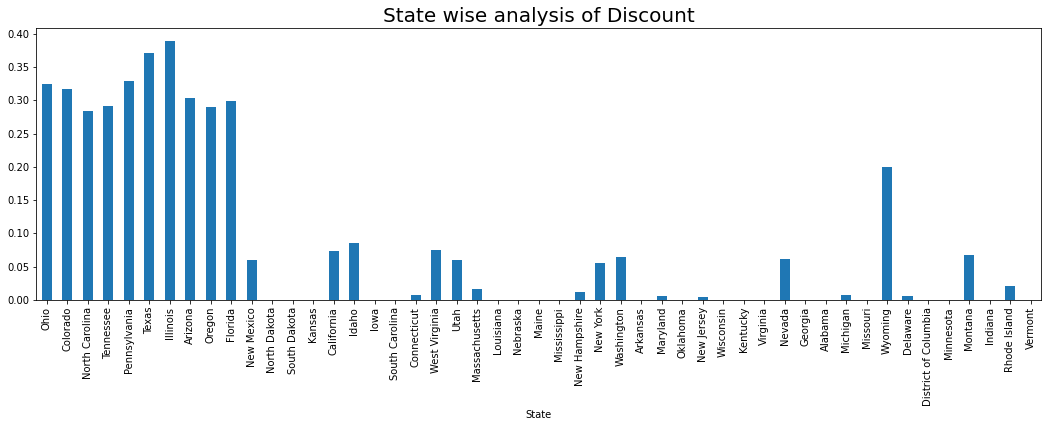

In [31]:
df_state1['Discount'].plot(kind='bar',figsize=(18,5))
plt.title('State wise analysis of Discount', fontsize=20)

#### Illinois at the top

## 6: City wise analysis of Profit

In [32]:
df_city= df.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
df_city = df_city.sort_values('Profit')
df_city.head()


,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052


Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

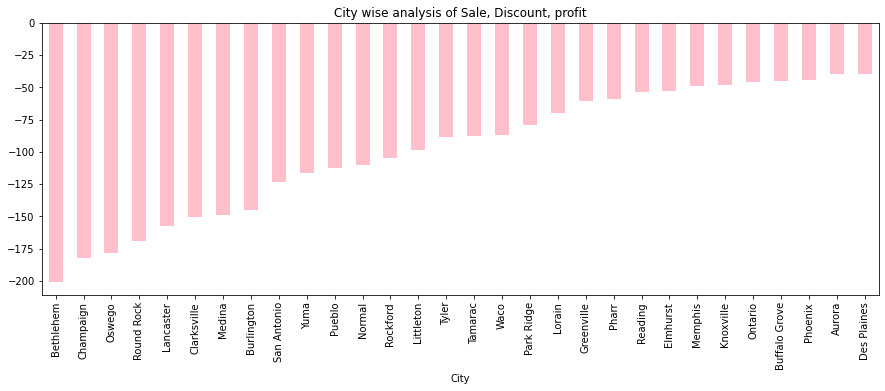

In [33]:
#1.Low Profit
df_city['Profit'].head(30).plot(kind='bar',figsize=(15,5),color = 'Pink')
plt.title('City wise analysis of Sale, Discount, profit')

#### 30 city which has less profit

Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

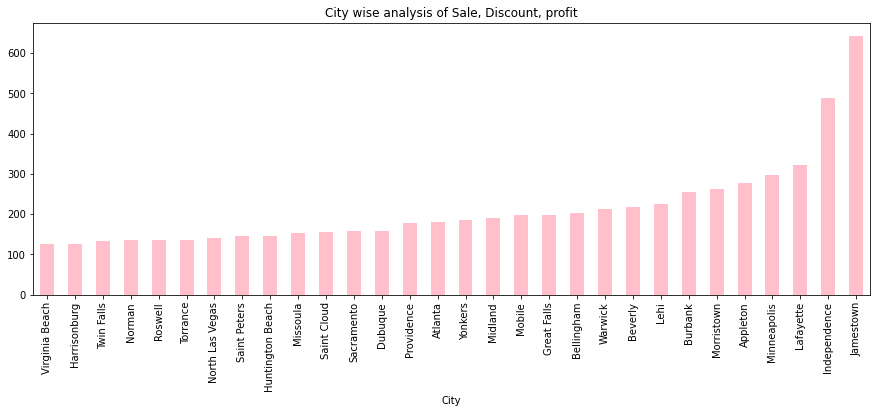

In [34]:
#2. High Profit
df_city['Profit'].tail(30).plot(kind='bar',figsize=(15,5),color = 'Pink')
plt.title('City wise analysis of Sale, Discount, profit')

#### 30 city which has High Profit

## 7: Quantity wise sales, Discount, Profit analyse

In [37]:
df_quantity = df.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
df_quantity.head(10)


,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.377982,0.154844,16.027769
3,175.630896,0.153321,23.720306
4,272.779827,0.158373,37.227971
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


Text(0.5, 1.0, 'Quantity wise analysis of Sale, Discount, profit')

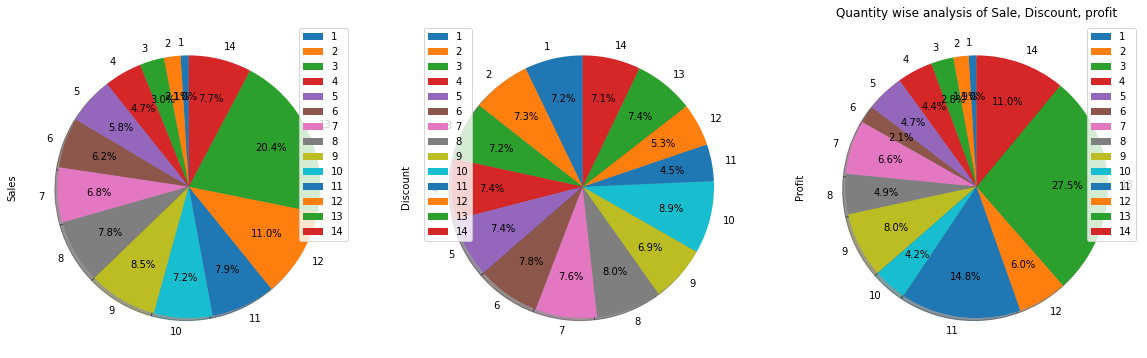

In [36]:
#1. sales 2. Discount 3. Profit
df_quantity.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20, 20),
                     pctdistance=0.69,
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_quantity.index)
plt.title('Quantity wise analysis of Sale, Discount, profit')

## 7: Category wise sales, Discount, Profit analyse

In [38]:
df_category = df.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
df_category

,Sales,Discount,Profit
Category,,,
Furniture,350.002981,0.174027,8.697740
Office Supplies,119.550107,0.157385,20.353403
Technology,452.709276,0.132323,78.752002


array([<AxesSubplot: ylabel='Sales'>, <AxesSubplot: ylabel='Discount'>,
       <AxesSubplot: ylabel='Profit'>], dtype=object)

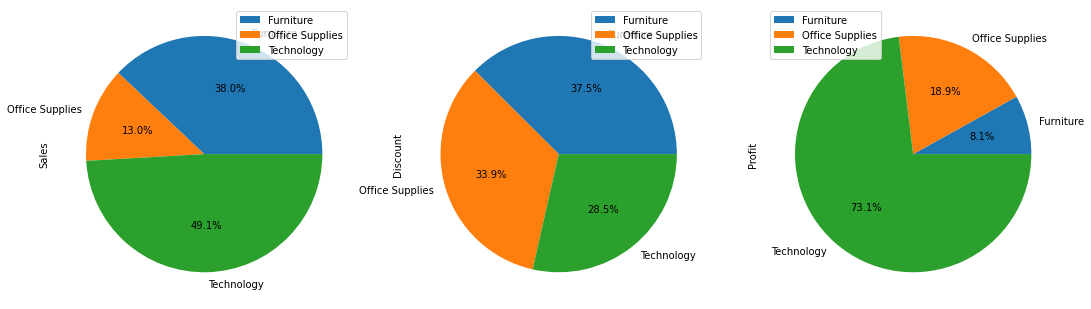

In [39]:
df_category.plot.pie(subplots=True, 
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_category.index)

In [ ]:
## 8:Sub-Category wise Sales, Profit and Discount

In [40]:
df_sub_category = df.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
df_sub_category.head(10)

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.096896,0.074969,8.207059
Binders,133.645972,0.372011,19.860710
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.971969,0.170244,43.198582
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


#### [1] based on sales

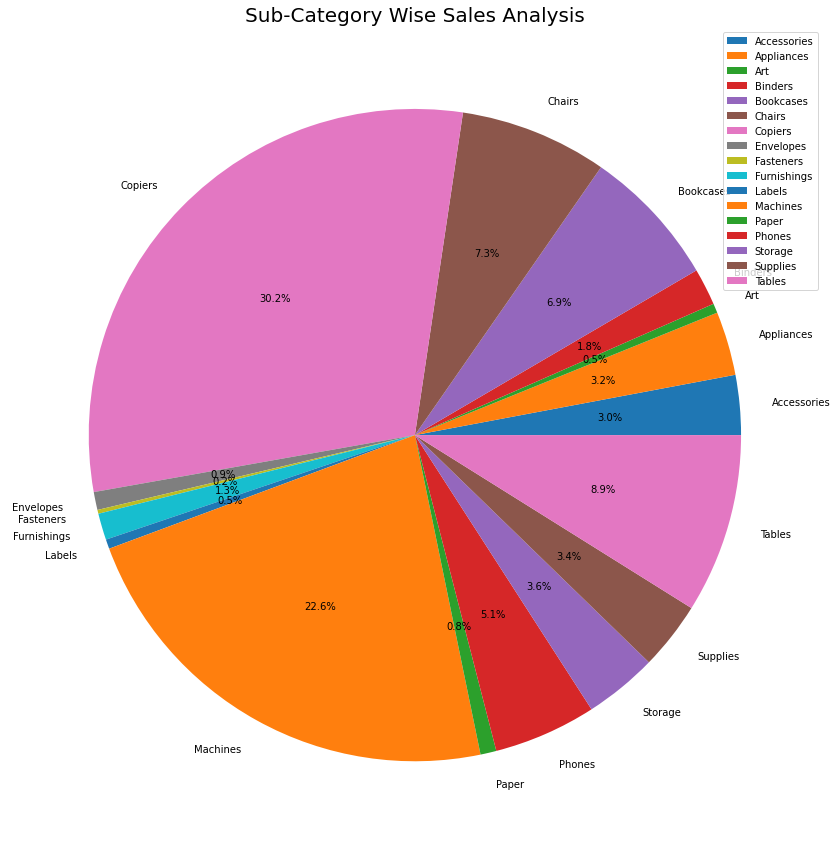

In [41]:
plt.figure(figsize = (15,15))
plt.pie(df_sub_category['Sales'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Sales Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

#### Copier then Machine have High sales.

### [2]Based on Discount

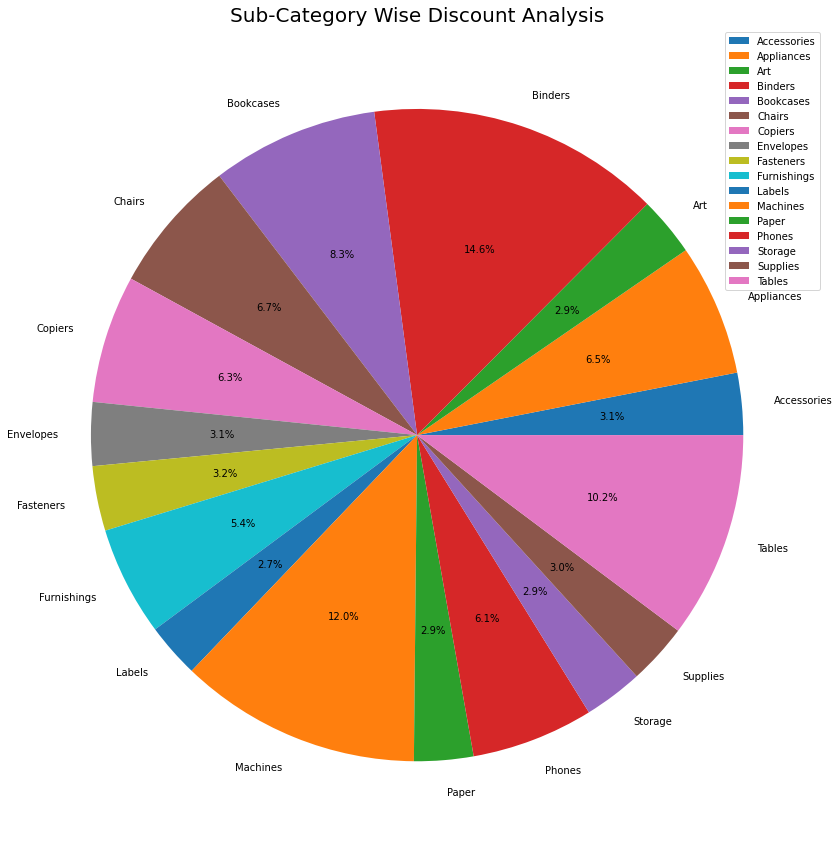

In [42]:
plt.figure(figsize = (15,15))
plt.pie(df_sub_category['Discount'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Discount Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()


In [ ]:
#### Binders , Machines and then tables have high Discount.

#### [3] Based on Profit

<AxesSubplot: xlabel='Sub-Category'>

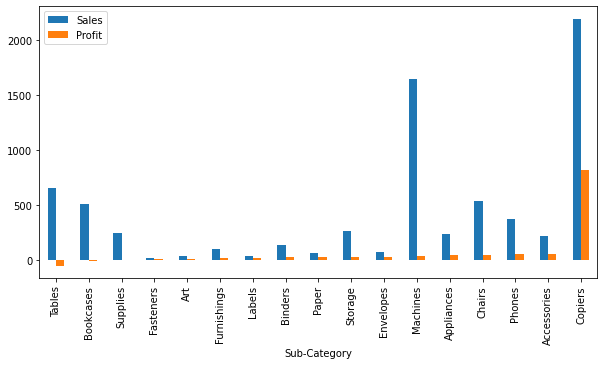

In [43]:
df_sub_category.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',
                                                              figsize= (10,5),
                                                              label=['Avg Sales Price($)','Profit($)'])


#### Copier: High Profit & sales

## 8: Region wise sales, profit, discount

In [46]:
df_region = df.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
df_region

,Sales,Discount,Profit
Region,,,
Central,215.947759,0.240250,17.100421
East,238.465798,0.145343,32.163905
South,241.803645,0.147253,28.857673
West,227.139254,0.109615,33.927281


In [ ]:
df_region.plot.pie(subplots=True, 
                   figsize=(18, 20), 
                   autopct='%1.1f%%',
                   labels = df_region.index)

## 9: Ship Mode wise sales, profit, discount

In [49]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [50]:
df_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()


array([<AxesSubplot: ylabel='Sales'>, <AxesSubplot: ylabel='Discount'>,
       <AxesSubplot: ylabel='Profit'>], dtype=object)

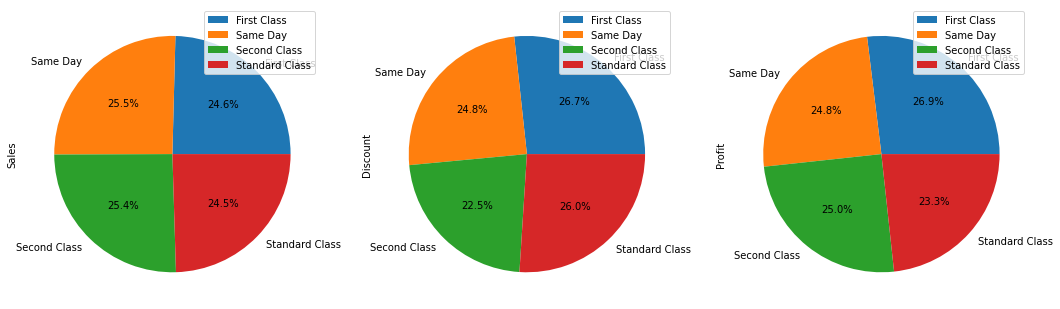

In [51]:
df_shipmode.plot.pie(subplots=True,
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_shipmode.index)


#### Profit and Discount is high in First Class
#### Sales is high for Same day ship

# Conclusion:

#### Profit is more than that of sale but there are some areas where profit could be increased.
#### Profit and Discount is high in First Class
#### Sales is high for Same day ship
#### Sub-category: Copier: High Profit & sales
#### Sub-category: Binders , Machines and then tables have high Discount.
#### Category: Maximun sales and Profit obtain in Technology.
#### Category: Minimun profit obtain in Furniture
#### State: Vermont: Highest Profit
#### State: Ohio: Lowest Profit
#### Segment: Home-office: High Profit & sales
#### Here is top 3 city where deals are Highest. 1. New York City 2. Los Angeles 3. Philadelphia
#### Sales and Profit are Moderately Correlated.
#### Quantity and Profit are less Moderately Correlated.
#### Discount and Profit are Negatively Correlated
#### Here is top 3 state where deals are Highest. 1. Califonia 2. New York 3. Texas
#### Wyoming: Lowest Number of deal,Highest amount of sales= Wyoming
#### Lowest amount of sales= South Dakota

## Completed Task 3.
### Thank you for going through this solution :)